<a href="https://colab.research.google.com/github/MattyXarope/Homework-Comp-Semantics/blob/main/Assignment_2_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [82]:
# -*- coding: utf-8 -*- 
import nltk
nltk.download('wordnet')
nltk.download('word2vec_sample')
from nltk.corpus import wordnet 
import pandas as pd
import gensim
from matplotlib import pyplot as plt
import numpy as np
import base64
import requests

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package word2vec_sample to /root/nltk_data...
[nltk_data]   Package word2vec_sample is already up-to-date!


# Exercise 1

In [83]:
## Exercise 1 ##

#Tests to see how many senses there are for the word language 
word = 'language'
synsets = wordnet.synsets(word, lang="eng")
n_synsets = len(synsets)

#Prints information about synsets for the word 
print(f'Lemma English: {word}')
print(f'Number of synsets: {n_synsets}')
print(f'Synsets details: ')
for ss in synsets:
    print(f'Name: {ss.name()}')
    print(f'Gloss: {ss.definition()}')
    print(f'Lemmas English: {ss.lemmas()}')
    print(f'\n')
    
#Establishes a concordance list for the word language in the Brown corpus (commented out due to use of sketch engine)
# corpus = brown.words()
# text = Text(corpus)
# con_list = text.concordance_list("language", width=250, lines=100)
# df = pd.DataFrame(data={"Utterance": con_list})
# df.to_csv("./Brown100.csv", sep=',',index=False)

#Adds file from SketchEngine of 100 instances of 'language' in the Brown corpus 

CSV_BROWN = "https://raw.githubusercontent.com/MattyXarope/Homework-Comp-Semantics/main/Brown100Final.csv"
lang_syn = pd.read_csv(CSV_BROWN)

#Create contigency table using data from lang_syn
adelle = lang_syn['adelle']
matt = lang_syn['matt']
annotations = pd.DataFrame({'Adelle': adelle, 'Matt': matt})

#Print contigency table data
print(f'******************\n')
print('contingency table: ')
print(f'******************\n\n')
# note the 'margins=True' parameter -- make sure you understand what it does
print(pd.crosstab(annotations['Adelle'], annotations['Matt'], margins=True))

Lemma English: language
Number of synsets: 6
Synsets details: 
Name: language.n.01
Gloss: a systematic means of communicating by the use of sounds or conventional symbols
Lemmas English: [Lemma('language.n.01.language'), Lemma('language.n.01.linguistic_communication')]


Name: speech.n.02
Gloss: (language) communication by word of mouth
Lemmas English: [Lemma('speech.n.02.speech'), Lemma('speech.n.02.speech_communication'), Lemma('speech.n.02.spoken_communication'), Lemma('speech.n.02.spoken_language'), Lemma('speech.n.02.language'), Lemma('speech.n.02.voice_communication'), Lemma('speech.n.02.oral_communication')]


Name: lyric.n.01
Gloss: the text of a popular song or musical-comedy number
Lemmas English: [Lemma('lyric.n.01.lyric'), Lemma('lyric.n.01.words'), Lemma('lyric.n.01.language')]


Name: linguistic_process.n.02
Gloss: the cognitive processes involved in producing and understanding linguistic communication
Lemmas English: [Lemma('linguistic_process.n.02.linguistic_process'), 

# Exercise 2

In [84]:
## Exercise 2 ## 

#Does some calculations about the data from part 1

#S1 Info
#Gloss: a systematic means of communicating by the use of sounds or conventional symbols
#Percent of all utterances 
all_percentS1 = (53/100)*100
print(f'S1 was agreed upon by both annotators in {all_percentS1}% of all utterances')

#S2 Info
#Gloss: (language) communication by word of mouth
#Percent of all utterances 
all_percentS2 = (1/100)*100
print(f'S2 was agreed upon by both annotators in {all_percentS2}% of all utterances')

#S3 Info
#Gloss: the text of a popular song or musical-comedy number
#Percent of all utterances 
all_percentS3 = (1/100)*100
print(f'S3 was agreed upon by both annotators in {all_percentS3}% of all utterances')

#S4 Info
#Gloss: the cognitive processes involved in producing and understanding linguistic communication
#Percent of all utterances 
all_percentS4 = (0/100)*100
print(f'S4 was agreed upon by both annotators in {all_percentS4}% of all utterances')

#S5 Info
#Gloss: the mental faculty or power of vocal communication
#Percent of all utterances 
all_percentS5 = (1/100)*100
print(f'S5 was agreed upon by both annotators in {all_percentS5}% of all utterances')

#S6 Info
#Gloss: a system of words used to name things in a particular discipline
#Percent of all utterances 
all_percentS6 = (8/100)*100
print(f'S6 was agreed upon by both annotators in {all_percentS6}% of all utterances')

#Print General Info for this section
all_agreements = all_percentS1 + all_percentS2 + all_percentS3 + all_percentS4 + all_percentS5 + all_percentS6
print(f'The annotators agreed on {all_agreements}% of all utterances')

S1 was agreed upon by both annotators in 53.0% of all utterances
S2 was agreed upon by both annotators in 1.0% of all utterances
S3 was agreed upon by both annotators in 1.0% of all utterances
S4 was agreed upon by both annotators in 0.0% of all utterances
S5 was agreed upon by both annotators in 1.0% of all utterances
S6 was agreed upon by both annotators in 8.0% of all utterances
The annotators agreed on 64.0% of all utterances


# Exercise 3

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Similarity')

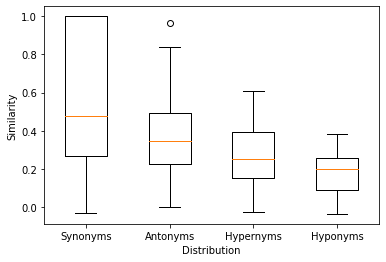

In [85]:
## Exercise 3 ## 

#Sets path for word2vec models
path_to_word2vec_sample = nltk.data.find('models/word2vec_sample/pruned.word2vec.txt')
word2vec_gensim = gensim.models.KeyedVectors.load_word2vec_format(path_to_word2vec_sample)

###Determines synonyms/antonyms###

#Extracts the synonyms and hyponyms from wordnet
lemmas=[]
synonyms=[]
antonyms=[]

for word in wordnet.words(): 
    for syn in wordnet.synsets(word)[5:]: 
      for l in syn.lemmas():
        if len(wordnet.synsets(word)) > 0 and len(l.antonyms()) > 0: 
          lemmas.append(syn.lemma_names()[0]) 
          synonyms.append(wordnet.synsets(word)[0].lemma_names()[0])
          if l.antonyms():
            antonyms.append(l.antonyms()[0].name())

#Fucntion to compare the cosine similarites in word2vec 
def cosine_gensim(list1, list2):
  similarities = []
  for elem1,elem2 in zip(list1,list2):
    if elem1 in word2vec_gensim and elem2 in word2vec_gensim:
      similarities.append(word2vec_gensim.similarity(elem1, elem2))  
  return similarities


#This just pairs them down to 500 data points
synonyms500 = synonyms[:500]
antonyms500 = antonyms[:500]

#Gets the cosine similarity of the two groups 
syns_similar = cosine_gensim(lemmas, synonyms500)
ants_similar = cosine_gensim(lemmas, antonyms500)


###Determines hypo/hypernyms###

#Extracts the hypernyms and hyponyms from wordnet 
lemmas2=[]
hypernyms=[]
hyponyms=[]

for word in wordnet.words(): 
    for syn in wordnet.synsets(word)[5:]: 
      for l in syn.lemmas():
        if len(syn.hypernyms()) > 0 and len(syn.hyponyms()) > 0: 
          lemmas2.append(syn.lemma_names()[0]) 
          hypernyms.append(syn.hypernyms()[0].lemma_names()[0])
          hyponyms.append(syn.hyponyms()[0].lemma_names()[0])

#This just pairs them down to 500 data points
hypernyms500 = hypernyms[:500]
hyponyms500 = hyponyms[:500]

#Gets the cosine similarity of the two groups 
hyper_similar = cosine_gensim(lemmas2, hypernyms500)
hypo_similar = cosine_gensim(lemmas2, hyponyms500)

#Plot for cosine info
fig, ax = plt.subplots()
ax.boxplot([syns_similar, ants_similar, hyper_similar, hypo_similar], widths=0.5)
plt.xticks([1, 2, 3, 4], ['Synonyms', 'Antonyms', 'Hypernyms', 'Hyponyms'])
plt.xlabel("Distribution")
plt.ylabel("Similarity")

In [86]:
#Some calculations for the data and analysis 

print("Data Analysis for Exercise 3:")
print(f'\n')

#Calculates means of data for each category
synsim = round(np.mean(cosine_gensim(lemmas, synonyms500))*100)
antsim = round(np.mean(cosine_gensim(lemmas, antonyms500))*100)
hypersim = round(np.mean(cosine_gensim(lemmas2, hypernyms500))*100)
hyposim = round(np.mean(cosine_gensim(lemmas2, hyponyms500))*100)

print(f'Synonyms show a {synsim}% similarity to their lemmas')
print(f'Antonyms show a {antsim}% similarity to their lemmas')
print(f'Hypernyms show a {hypersim}% similarity to their lemmas')
print(f'Hyponyms show a {hyposim}% similarity to their lemmas')
print(f'There is a {synsim-antsim}% difference between the similarities of synonyms and antonyms')
print(f'There is a {hypersim-hyposim}% difference between the similarities of hypernyms and hyponyms')
print(f'\n')


#Data analysis for hypothesis explanations for part 3
print("Data Analysis for Hypotheses Explanations in Exercise 3:")
print(f'\n')

#Calcuation for 'good' in hypothesis 1 explanation
lemmas=[]
synonyms=[]
antonyms=[]

word="good"
for syn in wordnet.synsets(word):
  for l in syn.lemmas():
    if len(wordnet.synsets(word)) > 0 and len(l.antonyms()) > 0:
      lemmas.append(syn.lemma_names()[0])
      synonyms.append(wordnet.synsets(word)[0].lemma_names()[0])
      if l.antonyms():
        antonyms.append(l.antonyms()[0].name())

syns_good = round(np.mean(cosine_gensim(lemmas, synonyms))*100)
ants_good = round(np.mean(cosine_gensim(lemmas, antonyms))*100)

print("Calcuation for 'good' in hypothesis 1 explanation:")
print(f'The word good is {syns_good}% similar to its synonyms')
print(f'The word good is {ants_good}% similar to its antonyms')


#Calcuation for 'food/fruit/apple' in hypothesis 2 explanation
food_fruit = round(np.mean(word2vec_gensim.similarity('food', 'fruit'))*100)
food_apple = round(np.mean(word2vec_gensim.similarity('food', 'apple'))*100)
print(f'The word food is {food_fruit}% similar to its synonyms')
print(f'The word good is {ants_good}% similar to its antonyms')



Data Analysis for Exercise 3:


Synonyms show a 55% similarity to their lemmas
Antonyms show a 38% similarity to their lemmas
Hypernyms show a 26% similarity to their lemmas
Hyponyms show a 19% similarity to their lemmas
There is a 17% difference between the similarities of synonyms and antonyms
There is a 7% difference between the similarities of hypernyms and hyponyms


Data Analysis for Hypotheses Explanations in Exercise 3:


Calcuation for 'good' in hypothesis 1 explanation:
The word good is 93% similar to its synonyms
The word good is 36% similar to its antonyms
The word food is 37% similar to its synonyms
The word good is 36% similar to its antonyms


# Exercise 5

In [183]:
#Import city state list 
master = "https://raw.githubusercontent.com/MattyXarope/Homework-Comp-Semantics/main/citystate.txt"
req = requests.get(master)
req = req.text

#Split list into items
citystate = req.split()

#Separate items into lists and create a dictionary 
city1 = citystate[0::4]
state1 = citystate[1::4]
city2 = citystate[2::4]
state2 = citystate[3::4]
dict = {'City 1': city1, 'State 1': state1, 'City 2': city2, 'State 2': state2}  

#Save to a csv file      
df = pd.DataFrame(dict) 
df.to_csv('citystate.csv') 

def analogy(list1, list2, list3):
  all_values = set(word2vec_gensim.vocab)
  return(
      [
          word2vec_gensim.most_similar(positive=[three, two], negative=[one], topn=1)
          if {one, two, three} <= all_values else 'None'
          for one, two, three in zip(list1, list2, list3)
      ]
  )

x = analogy(city1,state1,city2)
print(x)


[[('Texas', 0.6967871189117432)], [('Pennsylvania', 0.7848096489906311)], [('Arizona', 0.6820878982543945)], [('Texas', 0.6893488168716431)], [('Tennessee', 0.6449511051177979)], [('Indiana', 0.7485679388046265)], [('Texas', 0.6330227851867676)], [('Michigan', 0.7813218832015991)], [('Tennessee', 0.7373061776161194)], [('Massachusetts', 0.7822067737579346)], [('Oregon', 0.7605135440826416)], [('Colorado', 0.7402900457382202)], [('Maryland', 0.7844523191452026)], [('Tennessee', 0.7298486232757568)], [('Kentucky', 0.8187580704689026)], [('Wisconsin', 0.7759114503860474)], [('Oregon', 0.7581984996795654)], [('Arizona', 0.7073144912719727)], [('Nevada', 0.5964944362640381)], [('California', 0.6476739645004272)], [('Nevada', 0.5685901641845703)], [('Georgia', 0.7300536632537842)], [('Nebraska', 0.6894394159317017)], [('Ohio', 0.6433959007263184)], [('Oklahoma', 0.7220430374145508)], [('Michigan', 0.5653089284896851)], [('Ohio', 0.7837209701538086)], [('Minnesota', 0.6924184560775757)], [('K